<a href="https://colab.research.google.com/github/NanduB26/MAT-421/blob/main/rlbandi1_modB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MAT 421 Module B: Sections 17.4 and 17.5

#Lagrange Polynomial Interpolation

Lagrange Polynomial Interpolation is a method for constructing a single polynomial that passes through all given data points by combining smaller basis polynomials, each tailored to match one specific point while being zero at the others. The resulting polynomial exactly fits the provided data points and should be used only within their range for accurate results.

Given the points (x,y)={(1,2),(2,3),(3,5)}, use Lagrange Polynomial Interpolation to determine the polynomial that passes through all the points.

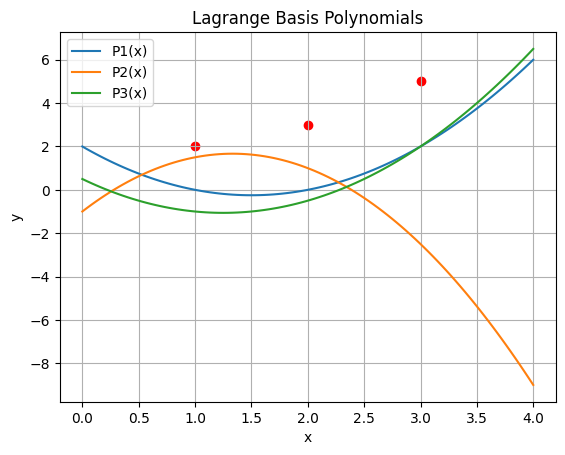

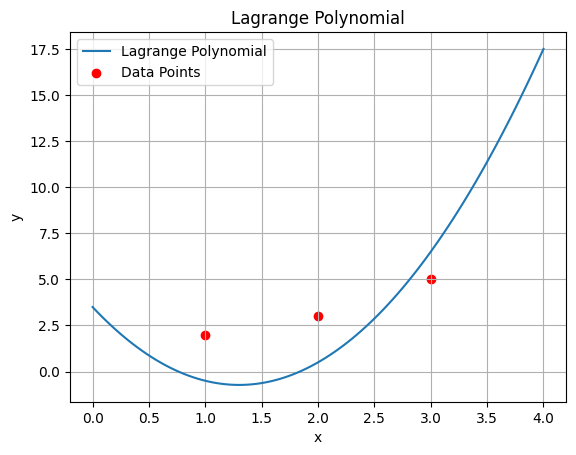

In [ ]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

# Define points
x = [1, 2, 3]
y = [2, 3, 5]

# Define Lagrange basis polynomials
P1_coeff = [2, -3, 1]    # (x - 2)(x - 3)/((1 - 2)(1 - 3))
P2_coeff = [-1, 4, -1.5] # (x - 1)(x - 3)/((2 - 1)(2 - 3))
P3_coeff = [0.5, -2.5, 1] # (x - 1)(x - 2)/((3 - 1)(3 - 2))

P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

# Lagrange polynomial
L = y[0]*P1 + y[1]*P2 + y[2]*P3

# Plot the basis polynomials
x_new = np.linspace(0, 4, 100)
plt.plot(x_new, P1(x_new), label="P1(x)")
plt.plot(x_new, P2(x_new), label="P2(x)")
plt.plot(x_new, P3(x_new), label="P3(x)")
plt.scatter(x, y, color='red')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Plot the final Lagrange polynomial
plt.plot(x_new, L(x_new), label="Lagrange Polynomial")
plt.scatter(x, y, color='red', label="Data Points")
plt.title('Lagrange Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

Given the points (x,y)={(0,1),(1,3),(2,5),(4,7)}, determine the Lagrange polynomial that passes through all the points.

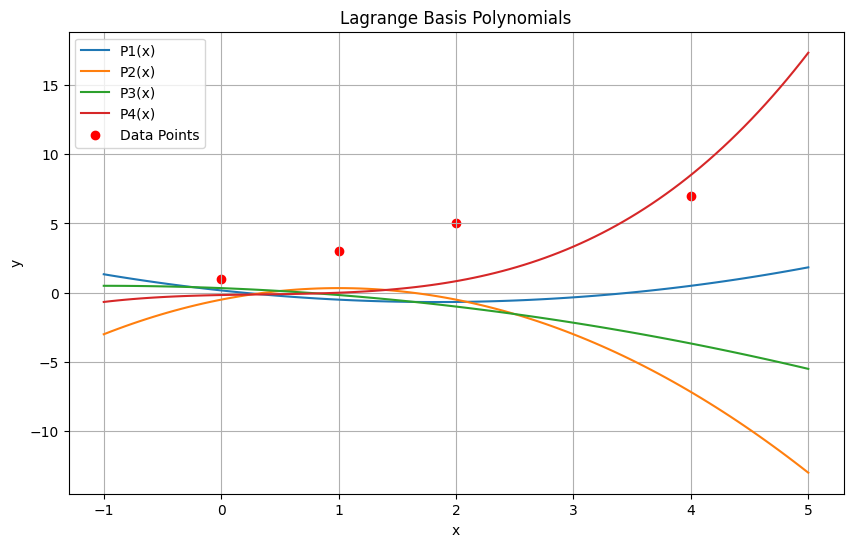

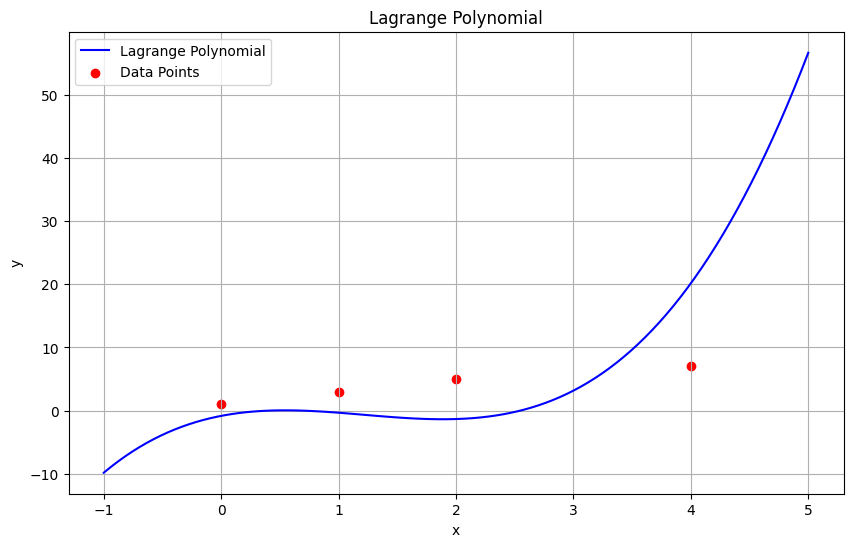

In [ ]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

# Data points
x = [0, 1, 2, 4]
y = [1, 3, 5, 7]

# Define the Lagrange basis polynomials
P1_coeff = [1/6, -11/12, 1/4, 0]  # (x-1)(x-2)(x-4)/((0-1)(0-2)(0-4))
P2_coeff = [-1/2, 5/3, -5/6, 0]   # (x-0)(x-2)(x-4)/((1-0)(1-2)(1-4))
P3_coeff = [1/3, -1/3, -1/6, 0]   # (x-0)(x-1)(x-4)/((2-0)(2-1)(2-4))
P4_coeff = [-1/6, 1/6, -1/6, 1/6] # (x-0)(x-1)(x-2)/((4-0)(4-1)(4-2))

P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)
P4 = poly.Polynomial(P4_coeff)

# Final Lagrange polynomial
L = y[0] * P1 + y[1] * P2 + y[2] * P3 + y[3] * P4

# Evaluate the polynomial over a range
x_new = np.linspace(-1, 5, 100)
y_new = L(x_new)

# Plot the basis polynomials
plt.figure(figsize=(10, 6))
plt.plot(x_new, P1(x_new), label="P1(x)")
plt.plot(x_new, P2(x_new), label="P2(x)")
plt.plot(x_new, P3(x_new), label="P3(x)")
plt.plot(x_new, P4(x_new), label="P4(x)")
plt.scatter(x, y, color='red', label="Data Points")
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Plot the final Lagrange polynomial
plt.figure(figsize=(10, 6))
plt.plot(x_new, y_new, label="Lagrange Polynomial", color="blue")
plt.scatter(x, y, color='red', label="Data Points")
plt.title('Lagrange Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

#Newton’s Polynomial Interpolation

Use Newton's Polynomial Interpolation to determine the polynomial that passes through the points (x,y)={(−2,4),(0,3),(2,9)}.

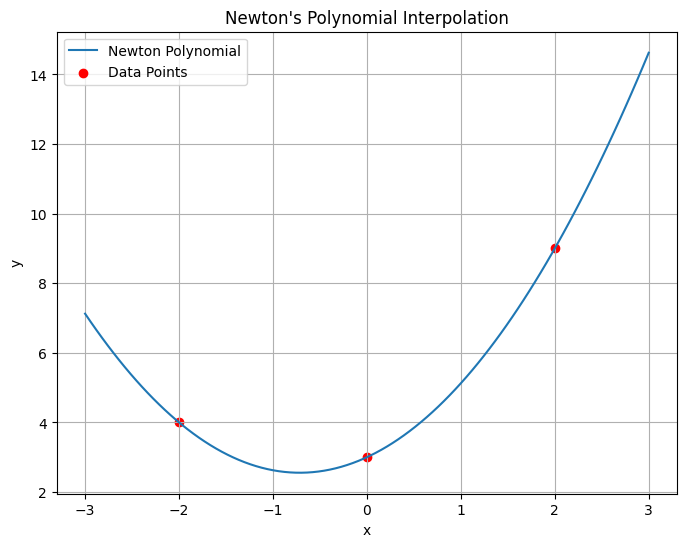

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define functions for Newton's Polynomial
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x[i + j] - x[i])
    return coef[0, :]

def newton_poly(coef, x_data, x):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1, n + 1):
        p = coef[n - k] + (x - x_data[n - k]) * p
    return p

# Data points
x = np.array([-2, 0, 2])
y = np.array([4, 3, 9])

# Compute coefficients
coefficients = divided_diff(x, y)

# Evaluate on a new range of points
x_new = np.linspace(-3, 3, 100)
y_new = newton_poly(coefficients, x, x_new)

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(x_new, y_new, label="Newton Polynomial")
plt.scatter(x, y, color='red', label="Data Points")
plt.title("Newton's Polynomial Interpolation")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

Use Newton's Polynomial Interpolation to determine the polynomial that passes through the points (x,y)={(−2,5),(−1,0),(1,3),(3,8),(4,6)}.

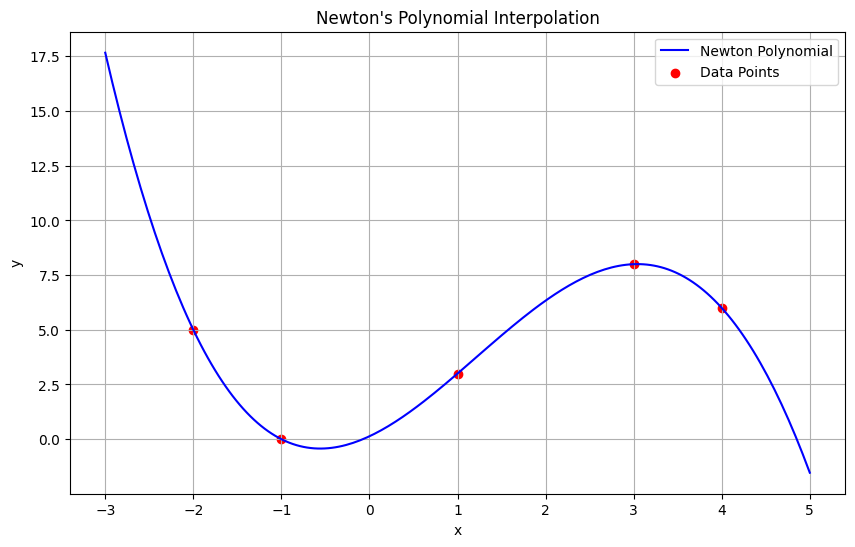

Divided Difference Coefficients:
[ 5.         -5.          2.16666667 -0.38333333  0.00555556]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute divided differences
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x[i + j] - x[i])
    return coef[0, :]

# Function to evaluate the Newton polynomial
def newton_poly(coef, x_data, x):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1, n + 1):
        p = coef[n - k] + (x - x_data[n - k]) * p
    return p

# Data points
x = np.array([-2, -1, 1, 3, 4])
y = np.array([5, 0, 3, 8, 6])

# Compute coefficients using divided differences
coefficients = divided_diff(x, y)

# Evaluate the polynomial on a fine grid
x_new = np.linspace(-3, 5, 200)
y_new = newton_poly(coefficients, x, x_new)

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(x_new, y_new, label="Newton Polynomial", color="blue")
plt.scatter(x, y, color='red', label="Data Points")
plt.title("Newton's Polynomial Interpolation")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Print the coefficients
print("Divided Difference Coefficients:")
print(coefficients)